In [8]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime, timedelta


def fetch_rates(date):
    url = f"https://rate.bot.com.tw/ir/index/{date}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # 找到美金的利率行
    rows = soup.find_all("tr")
    for row in rows:
        if "美金" in row.text:
            cells = row.find_all("td", class_="text-right")
            rates = [cell.text.strip() for cell in cells]
            return rates
    return []


# 設定日期範圍
end_date = datetime.now()
# 台銀最多提供4年資訊
start_date = end_date.replace(year=end_date.year - 4)

# 儲存每個月第一天的利率資訊
data = []
while start_date <= end_date:
    first_day_of_month = start_date.replace(day=1)
    rates = fetch_rates(first_day_of_month.strftime("%Y-%m-%d"))
    if rates:
        data.append([first_day_of_month.strftime("%Y-%m-%d")] + rates)
    start_date += timedelta(days=32)
    start_date = start_date.replace(day=1)

# 將數據轉換為 pandas DataFrame
# 動態生成列名
column_names = ["日期"] + ["活期", "7天", "14天", "21天", "1個月", "3個月", "6個月", "9個月", "1年"]
df = pd.DataFrame(data, columns=column_names)
print(df.head())

# 儲存為 Excel 文件
df.to_excel("台銀美金定存利率.xlsx", index=False)

           日期    活期    7天   14天   21天   1個月   3個月  6個月   9個月    1年
0  2019-12-01  0.33  0.75  0.75  0.75   0.8  1.15  1.3   1.4  1.55
1  2020-01-01  0.33  0.75  0.75  0.75   0.8  1.15  1.3   1.4  1.55
2  2020-02-01  0.33  0.75  0.75  0.75   0.8  1.15  1.3   1.4  1.55
3  2020-03-01  0.33  0.75  0.75  0.75   0.8  1.15  1.3   1.4  1.55
4  2020-04-01  0.15   0.3   0.3   0.3  0.35   0.5  0.6  0.65  0.75


繪圖

           日期    活期    7天   14天   21天   1個月   3個月  6個月   9個月    1年
0  2019-12-01  0.33  0.75  0.75  0.75   0.8  1.15  1.3   1.4  1.55
1  2020-01-01  0.33  0.75  0.75  0.75   0.8  1.15  1.3   1.4  1.55
2  2020-02-01  0.33  0.75  0.75  0.75   0.8  1.15  1.3   1.4  1.55
3  2020-03-01  0.33  0.75  0.75  0.75   0.8  1.15  1.3   1.4  1.55
4  2020-04-01  0.15   0.3   0.3   0.3  0.35   0.5  0.6  0.65  0.75


/var/folders/vm/_zft15050r7cfh47y6v5z4k40000gn/T/ipykernel_72854/309175494.py:57: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.tight_layout()
/var/folders/vm/_zft15050r7cfh47y6v5z4k40000gn/T/ipykernel_72854/309175494.py:57: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  plt.tight_layout()
/var/folders/vm/_zft15050r7cfh47y6v5z4k40000gn/T/ipykernel_72854/309175494.py:57: UserWarning: Glyph 21033 (\N{CJK UNIFIED IDEOGRAPH-5229}) missing from current font.
  plt.tight_layout()
/var/folders/vm/_zft15050r7cfh47y6v5z4k40000gn/T/ipykernel_72854/309175494.py:57: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  plt.tight_layout()
/var/folders/vm/_zft15050r7cfh47y6v5z4k40000gn/T/ipykernel_72854/309175494.py:57: UserWarning: Glyph 21488 (\N{CJK UNIFIED IDEOGRAPH-53F0}) missing from current font.
  plt.tight_layout()
/var/folders/vm/_zft15050r7cfh47y6v5z4k40000gn/T/ipykernel_7

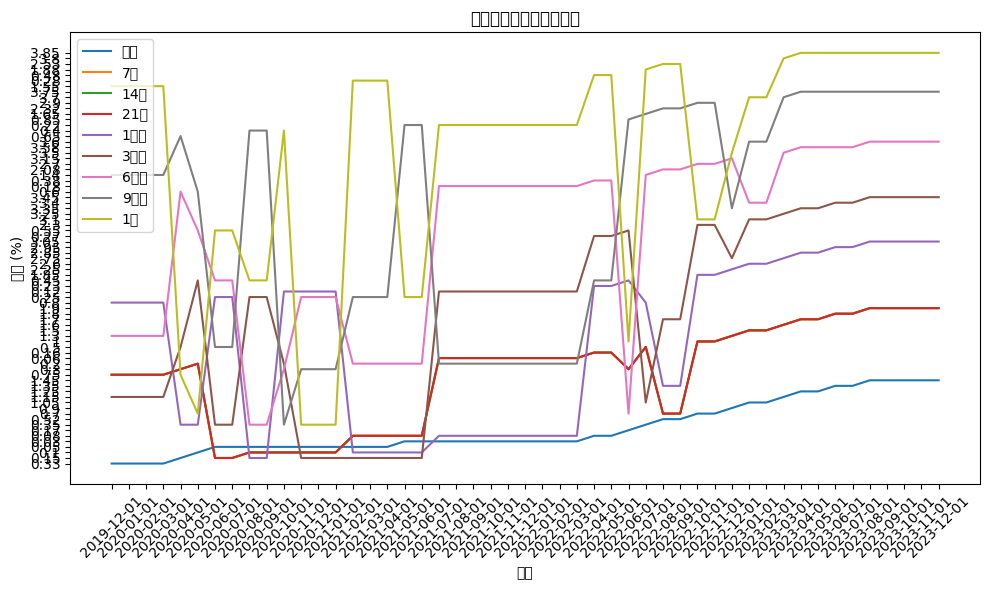

In [9]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


def fetch_rates(date):
    url = f"https://rate.bot.com.tw/ir/index/{date}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # 找到美金的利率行
    rows = soup.find_all("tr")
    for row in rows:
        if "美金" in row.text:
            cells = row.find_all("td", class_="text-right")
            rates = [cell.text.strip() for cell in cells]
            return rates
    return []


# 設定日期範圍
end_date = datetime.now()
# 台銀最多提供4年資訊
start_date = end_date.replace(year=end_date.year - 4)

# 儲存每個月第一天的利率資訊
data = []
while start_date <= end_date:
    first_day_of_month = start_date.replace(day=1)
    rates = fetch_rates(first_day_of_month.strftime("%Y-%m-%d"))
    if rates:
        data.append([first_day_of_month.strftime("%Y-%m-%d")] + rates)
    start_date += timedelta(days=32)
    start_date = start_date.replace(day=1)

# 將數據轉換為 pandas DataFrame
# 動態生成列名
column_names = ["日期"] + ["活期", "7天", "14天", "21天", "1個月", "3個月", "6個月", "9個月", "1年"]
df = pd.DataFrame(data, columns=column_names)
print(df.head())

# 儲存為 Excel 文件
df.to_excel("台銀美金定存利率.xlsx", index=False)

# 繪製走勢圖
plt.figure(figsize=(10, 6))
for col in df.columns[1:]:
    plt.plot(df["日期"], df[col], label=col)

plt.xlabel("日期")
plt.ylabel("利率 (%)")
plt.title("台銀美金定存利率走勢圖")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

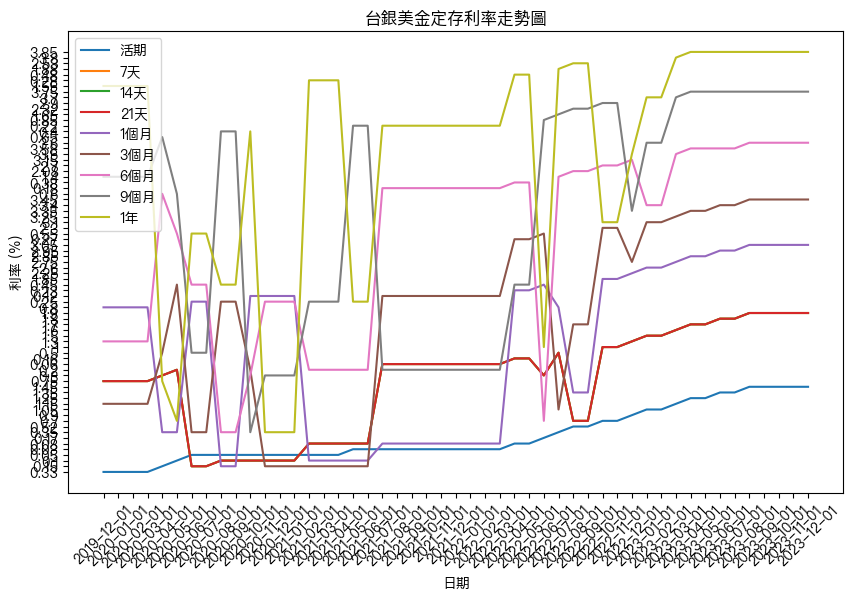

In [16]:
import matplotlib.pyplot as plt
import matplotlib

# 设置中文字体
plt.rcParams["font.sans-serif"]=["PingFang HK"]
plt.rcParams["axes.unicode_minus"]=False


# 繪製走勢圖
plt.figure(figsize=(10, 6))
for col in df.columns[1:]:
    plt.plot(df["日期"], df[col], label=col)

plt.xlabel("日期")
plt.ylabel("利率 (%)")
plt.title("台銀美金定存利率走勢圖")
plt.xticks(rotation=45)
plt.legend()

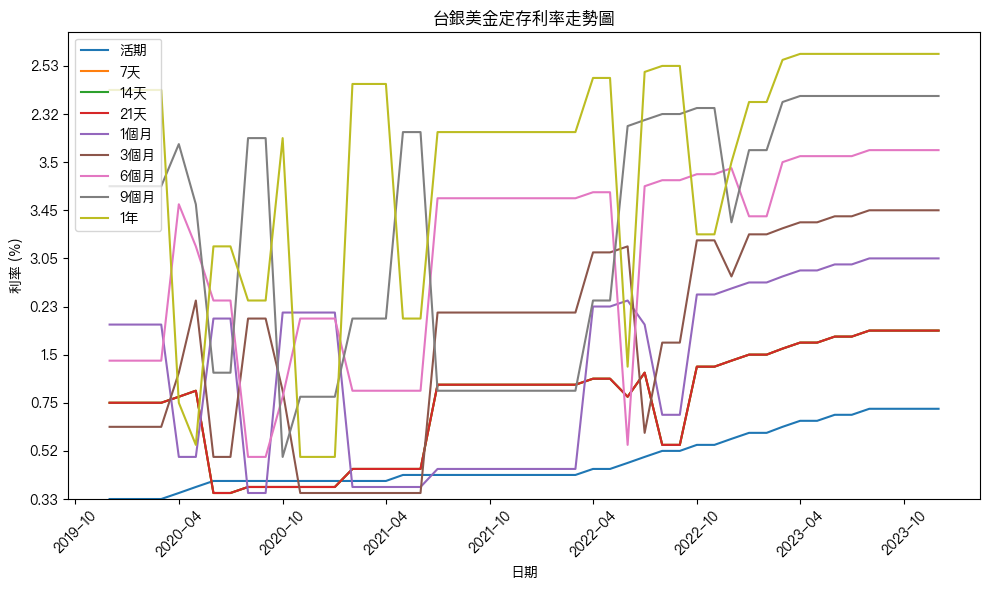

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime

# 将日期字串转换为 datetime 对象
df["日期"] = pd.to_datetime(df["日期"])

# 设置中文字体
plt.rcParams["font.sans-serif"]=["PingFang HK"]
plt.rcParams["axes.unicode_minus"]=False

# 繪製走勢圖
plt.figure(figsize=(10, 6))
for col in df.columns[1:]:
    plt.plot(df["日期"], df[col], label=col)

# 設置 x 軸每半年標示一次
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 設置 y 軸顯示範圍和間隔
plt.gca().set_ylim(bottom=0)  # 設置 y 軸下限
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))  # 整數間隔

plt.xlabel("日期")
plt.ylabel("利率 (%)")
plt.title("台銀美金定存利率走勢圖")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
